In [154]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [155]:
data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
print(data.shape)

(2500, 13)


In [156]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [157]:
X = data.drop('Class', axis=1) 
true_labels = data['Class']

In [159]:
k = 2

In [160]:
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster_labels'] = kmeans.fit_predict(X)

/home/jishnu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [161]:
label_encoder = LabelEncoder()
data['pseudo_labels'] = label_encoder.fit_transform(data['cluster_labels'])


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, data['pseudo_labels'], test_size=0.2, random_state=42)


In [163]:
accuracy = accuracy_score(y_test, kmeans.predict(X_test))
classification_report_str = classification_report(y_test, kmeans.predict(X_test))

In [164]:
print(f'Accuracy: {accuracy:.2f}')
print(classification_report_str)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       280

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [165]:
data['Cluster'] = kmeans.labels_

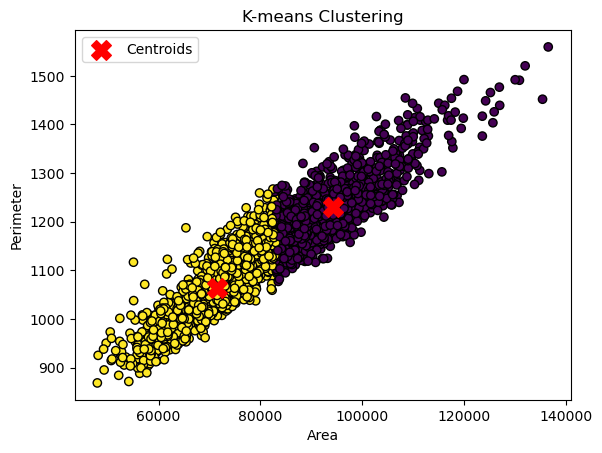

In [166]:
plt.scatter(data['Area'], data['Perimeter'], c=data['Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

In [168]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.59
